In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

# Задание

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

**1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)**

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety**

In [ ]:
df_iris = df[['sepal length (cm)', 'sepal width (cm)']]
df_iris.rename(columns = {'sepal length (cm)' : 'sepal_length', 'sepal width (cm)' : 'sepal_width'}, inplace = True) 
df_iris.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
df_variety = pd.DataFrame(data['target'], columns = ['variety'])
df_variety.value_counts()   # В группах одинаковое количество значений, что положительно будет влиять на качество модели. 'target_names': array(['setosa', 'versicolor', 'virginica']

variety
0          50
1          50
2          50
dtype: int64

**Проверим корреляюцию между признаками, между признаками и целевой переменной, распределение и однородность.**

In [ ]:
df_iris['sepal_length'].corr(df_iris['sepal_width']) 

-0.11756978413300208

In [ ]:
df_variety['variety'].corr(df_iris['sepal_width'], method='spearman') 

-0.440289584131434

In [ ]:
df_variety['variety'].corr(df_iris['sepal_length'], method='spearman')  

0.7980781172420549

▶ Корреляция между признаками слабая, как и необходимо модели.

▶ Связь между целевой переменной и признаком sepal_width отрицательная средняя (ближе к слабой). Связь между целевой переменной и признаком sepal_length положительная сильная. В линейном дискрименантном анализе целевая переменная должна хорошо коррелировыать с признаками. Признак sepal_width можно было бы удалить из модели (при достаточном количестве других подходящих признаков).

In [ ]:
df_iris.std() 

sepal_length    0.828066
sepal_width     0.435866
dtype: float64

▶  Дисперсии отличаются, признак sepal_length имеет более сильный разброс от среднего, чем переменная sepal_width, возможно, это будет влиять на качество модели. 

Text(0.5, 1.0, 'Распределение переменных-признаков')

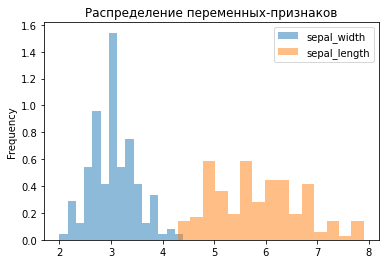

In [ ]:
df_iris['sepal_width'].plot(kind='hist', 
                     alpha = 0.5,
                     bins=15,
                     density = True)


df_iris['sepal_length'].plot(kind='hist', 
                     alpha = 0.5,
                     bins=15,
                     density = True)
plt.legend(loc='upper right')
plt.title('Распределение переменных-признаков')

▶ Распределение признаков близко к нормальному (sepal_length не очень)

**3. Разделите данные на выборку для обучения и тестирования**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_iris, df_variety, test_size=0.20)

**4. Постройте модель LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
result = pd.DataFrame([np.array(y_test['variety']), lda.predict(X_test)]).T  
 # т.к. при выполнении pd.DataFrame([y_test, lda.predict(X_test)]).T 
 # выходила ошибка "could not broadcast input array from shape (30,1) into shape (30,)"
 # y_test приведён к [np.array(y_test['variety']), чтобы совпадали входные типы данных
result

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,2,2
7,1,2
8,1,1
9,2,2


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))    # точноть модели 73,3%

0.8666666666666667

In [ ]:
lda.coef_

array([[-5.97501712,  7.96787597],
       [ 1.63167333, -3.74519832],
       [ 3.772842  , -3.34419708]])

**5. Визуализируйте предсказания для тестовой выборки и центры классов**

In [ ]:
lda.means_

array([[5.03243243, 3.42972973],
       [5.93255814, 2.74651163],
       [6.4825    , 2.9625    ]])

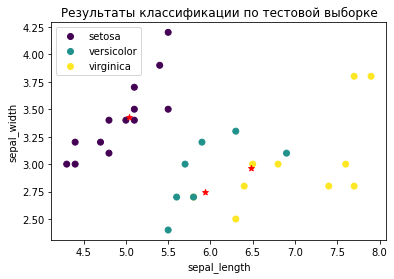

In [ ]:
scatter = plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test['variety'])
plt.title('Результаты классификации по тестовой выборке')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(handles=scatter.legend_elements()[0], labels=['setosa', 'versicolor', 'virginica'], loc=2)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', marker='*')

▶ Группы жёлткого и бирюзового цветов смешиваются, здесь веротяны ошибки. Двух признков недостаточно, чтобы построить данную модель (кроме этого, как выяснили ранее, один признак - sepal_width мало влияет на целевую переменную)

**6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width**

In [ ]:
df_iris.describe()

,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


У переменной sepal_length разброс значений от 4.3 до 7.9, а у sepal_width - от 2 до 4.4. Диапазон последней переменной в два раза меньше, чем у первой, хотя сами диапазоны не сильно отлдичаются. Но всё же нормализуем данные.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
iris_norm = scaler.fit_transform(np.array(df_iris))

Text(0, 0.5, 'sepal_width')

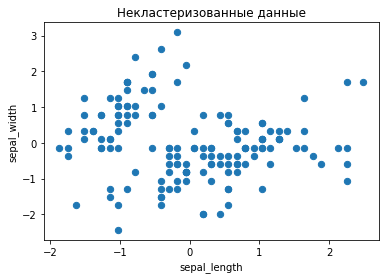

In [ ]:
plt.scatter(iris_norm[:, 0], iris_norm[:, 1], s=40)
plt.title('Некластеризованные данные')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

**7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию**

In [ ]:
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_norm)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

Text(0.5, 1.0, 'График локтя для определения количества кластеров')

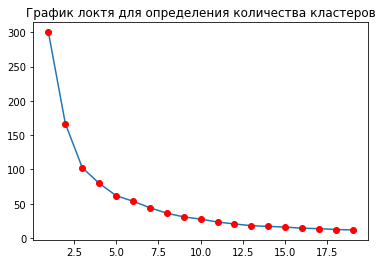

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.title('График локтя для определения количества кластеров')

▶ Выбираем количество кластеров 3, т.к. после 3, график "скатился"

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_iris)

Text(0, 0.5, 'sepal_width')

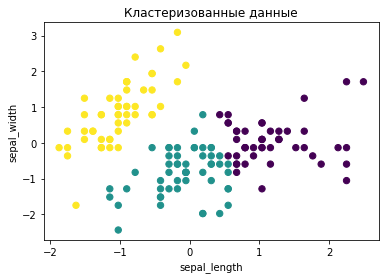

In [ ]:
plt.scatter(iris_norm[:, 0], iris_norm[:, 1], c=clusters, s=40)
plt.title('Кластеризованные данные')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

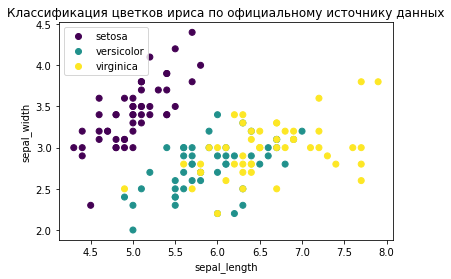

In [ ]:
scatter = plt.scatter(df_iris['sepal_length'], df_iris['sepal_width'], c=df_variety['variety'])
plt.title('Классификация цветков ириса по официальному источнику данных')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(handles=scatter.legend_elements()[0], labels=['setosa', 'versicolor', 'virginica'], loc=2)